<a href="https://colab.research.google.com/github/my9oso6gqm/my9oso6gqm.github.io/blob/main/varie/temp/1/trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
## Installo i pacchetti

In [ ]:
!pip install binance-connector

In [14]:
## Importo le librerie

In [15]:
from binance.spot import Spot as Client
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
## Recupero dati da Binance

In [17]:
def recupero_dati(valuta, limite):
    spot_client = Client(base_url="https://api.binance.com")
    data = spot_client.klines(valuta, "1m", limit=limite)
    df = pd.DataFrame(data)
    df[0] = (pd.to_datetime(df[0],unit='ms'))
    df = df.drop(columns=[6, 7, 8, 9, 10, 11])
    df.columns = ['data', 'apertura', 'massimo', 'minimo', 'chiusura', 'volume']
    df["chiusura"] = df["chiusura"].astype(float)
    return df

In [18]:
dati_cardano = recupero_dati("ADAUSDT",100)

In [19]:
## Grafico chiusure di Cardano

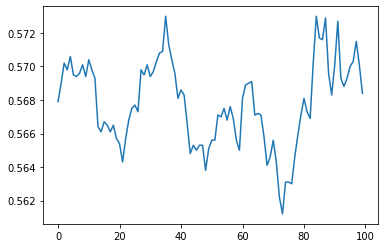

In [20]:
dati_cardano["chiusura"].plot()

In [21]:
## Media mobile

$$SMA = \frac{\sum_{i=1}^{N}Pi}{N}$$

In [22]:
## Creo una funzione che crea un Dataframe e calcolo la mobile mobile.
## Come parametri vuole un Dataframe (Con colonna close) e il periodo della
## media mobile

In [23]:
def media_mobile(dati, window):
    segnali = pd.DataFrame(index=dati.index)
    segnali['chiusura'] = dati['chiusura']
    segnali['media mobile'] = dati['chiusura'].rolling(window=window,min_periods=1, center=False).mean()
    return segnali

In [24]:
mm=media_mobile(dati_cardano,5)

In [25]:
## Grafico la colonna close e la colonna media mobile

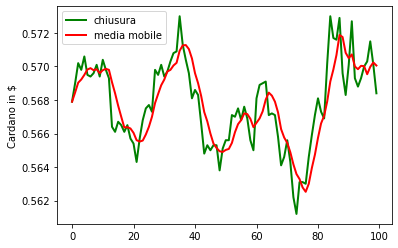

In [26]:
chiusura_plot = mm['chiusura']
mm_plot = mm['media mobile']

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Cardano in $')
chiusura_plot.plot(ax=ax1, color='g', lw=2., legend=True)
mm_plot.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

In [27]:
## Doppia media mobile

In [28]:
def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['chiusura'].rolling(window=short_window,min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['chiusura'].rolling(window=long_window,min_periods=1, center=False).mean()
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()
    return signals

ts=double_moving_average(dati_cardano,5,10)

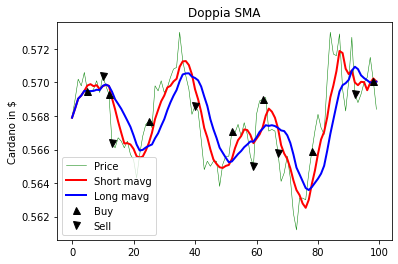

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Cardano in $')
dati_cardano["chiusura"].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)
ax1.plot(ts.loc[ts.orders== 1.0].index,
    dati_cardano["chiusura"][ts.orders == 1.0],
    '^', markersize=7, color='k')
ax1.plot(ts.loc[ts.orders== -1.0].index,
    dati_cardano["chiusura"][ts.orders == -1.0],
    'v', markersize=7, color='k')
plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
plt.title("Doppia SMA")
plt.show()